## This code uses the segmentation output and the annotation output to calculate and graph:
1) The number of songs the bird sang each day
2) The distribution of song durations for each day
3) The number of songs annotated each day, and 
4) The percentage of the total songs annotated from each day.

### Step 1: Have the user input the path to song_database .csv file, as well as the segmentation data's .csv file, and the corresonding .json file with the folder/file creation times. Update the data frame with the date and time of each file.

In [3]:
import pandas as pd

# Paths to the files
path_to_annotation_song_database_csv = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/2nd_set_of_song_databases/corrected_labels_USA5288-Rose-AreaX_database.csv'
path_to_json_file = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/2nd_set_of_song_databases/USA5288_creation_data.json'
path_to_segmentation_csv = '/Users/mirandahulsey-vincent/Documents/allPythonCode/syntax_analysis/2nd_set_of_song_databases/USA5288_segmentation.csv'

# Load the CSV and JSON data
annotation_song_data = pd.read_csv(path_to_annotation_song_database_csv)
segmentation_data = pd.read_csv(path_to_segmentation_csv)
recording_dates = pd.read_json(path_to_json_file)

# Function to extract the animal_id from the file name
def extract_animal_id(file_name):
    animal_id = file_name.split('_')[0]
    return animal_id

# Function to extract month and day from file name
def extract_month_day(file_name):
    parts = file_name.split('_')
    month = parts[2]
    day = parts[3]
    return int(month), int(day)

# Function to get the correct year based on the month using the JSON data
def get_year_from_json(month, json_data):
    # Loop through subdirectories in the JSON data to match the month
    for subdir, subdir_info in json_data['subdirectories'].items():
        creation_date = subdir_info['subdirectory_creation_date']
        json_month = int(creation_date.split('-')[1])  # Extract month from JSON date
        if json_month == month:
            year = creation_date.split('-')[0]  # Extract year from JSON date
            return year
    return None  # Return None if no matching year is found

# Function to extract date and time from file name and get year from JSON
def extract_date_time(file_name, json_data):
    parts = file_name.split('_')
    # Extract the month, day, hour, minute, second from the file name
    month = int(parts[2])
    day = int(parts[3])
    hour = parts[4]
    minute = parts[5]
    second = parts[6].split('.')[0]
    
    # Get the correct year using the month from the JSON file
    year = get_year_from_json(month, json_data)
    
    # Combine into a date and time string
    date = f"{year}-{month:02d}-{day:02d}"  # Format the date as YYYY-MM-DD
    time = f"{hour}:{minute}:{second}"      # Format the time as HH:MM:SS
    
    return date, time

# Function to update segmentation_data with animal_id, date, and time
def update_segmentation_data(segmentation_data, json_data):
    # Add the animal_id column
    segmentation_data['animal_id'] = segmentation_data['file_name'].apply(extract_animal_id)
    
    # Add the date and time columns
    segmentation_data[['date', 'time']] = segmentation_data['file_name'].apply(lambda x: pd.Series(extract_date_time(x, json_data)))
    
    return segmentation_data

# Update the segmentation_data DataFrame with animal_id, date, and time
segmentation_data = update_segmentation_data(segmentation_data, recording_dates)

# Check for unique animal IDs and print a warning if there is more than 1 unique animal ID
unique_animal_ids = segmentation_data['animal_id'].unique()

if len(unique_animal_ids) > 1:
    print("WARNING: CSV contains multiple animals' data!")
    print(f"Unique animal IDs:{unique_animal_ids}")

# Print the first couple of rows of the updated DataFrame
print(segmentation_data.head(2))

                                  file_name onset/offset animal_id  \
0   USA5288_45370.62942340_3_19_17_29_2.wav           []   USA5288   
1  USA5288_45370.63527315_3_19_17_38_47.wav           []   USA5288   

         date      time  
0  2024-03-19   17:29:2  
1  2024-03-19  17:38:47  


### Step 2: Find and graph the number files with/without song for each day. Find and graph the number of songs the bird sang each day.

Rows with empty onset/offset arrays:
                                  file_name onset/offset animal_id  \
0   USA5288_45370.62942340_3_19_17_29_2.wav           []   USA5288   
1  USA5288_45370.63527315_3_19_17_38_47.wav           []   USA5288   

         date      time  
0  2024-03-19   17:29:2  
1  2024-03-19  17:38:47  

Rows with non-empty onset/offset arrays:
                                   file_name  \
5   USA5288_45370.42351088_3_19_11_45_51.wav   
15    USA5288_45370.30842488_3_19_8_34_2.wav   

                           onset/offset animal_id        date      time  
5   [(7.809, 20.111), (57.165, 62.911)]   USA5288  2024-03-19  11:45:51  
15    [(4.715, 11.271), (13.039, 23.5)]   USA5288  2024-03-19    8:34:2  


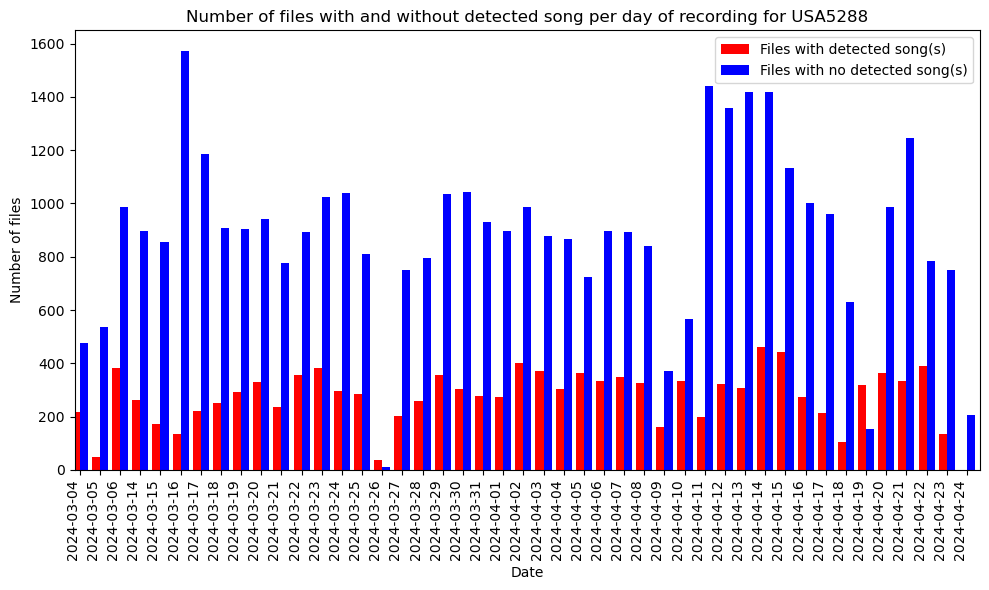

/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_98525/850928841.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_empty_onset_offset_data['num_songs'] = non_empty_onset_offset_data['onset/offset'].apply(count_songs)


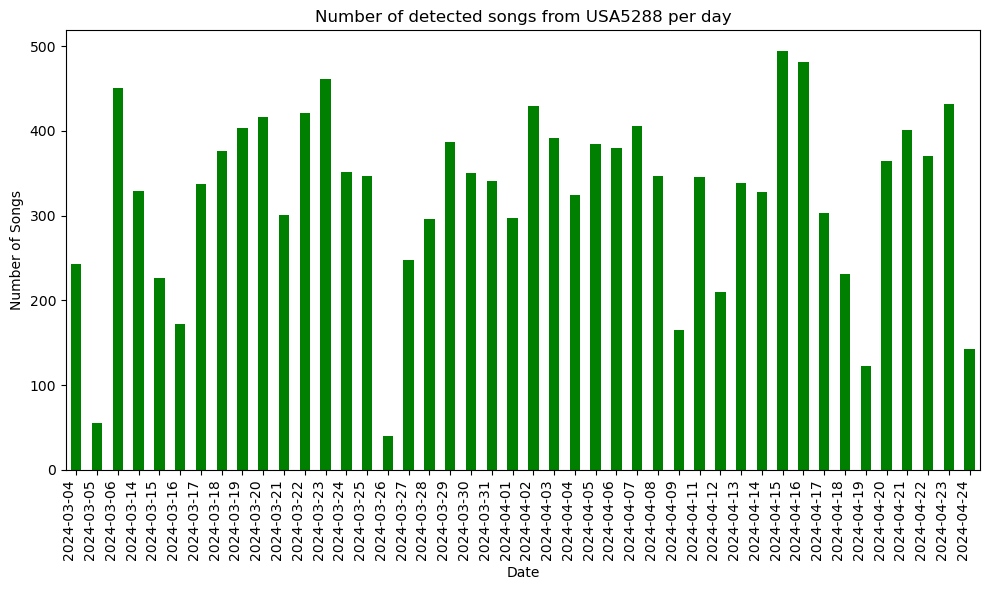

In [4]:
import pandas as pd
# Assuming segmentation_data is already updated with date and time from previous steps

# Filter DataFrame to contain only rows where onset/offset is an empty array (represented as a string '[]')
empty_onset_offset_data = segmentation_data[segmentation_data['onset/offset'] == '[]']

# Filter DataFrame to contain only rows where onset/offset is a non-empty array (not '[]')
non_empty_onset_offset_data = segmentation_data[segmentation_data['onset/offset'] != '[]']

# Print the first couple of rows of each DataFrame for verification
print("Rows with empty onset/offset arrays:")
print(empty_onset_offset_data.head(2))

print("\nRows with non-empty onset/offset arrays:")
print(non_empty_onset_offset_data.head(2))

import pandas as pd
import matplotlib.pyplot as plt

# Assuming segmentation_data, non_empty_onset_offset_data, and empty_onset_offset_data are already available from previous steps

# Get the first animal ID from unique animal IDs
first_animal_id = segmentation_data['animal_id'].unique()[0]

# Group by the 'date' column and count the number of files with non-empty and empty onset/offset arrays for each date
files_with_non_empty_arrays_per_day = non_empty_onset_offset_data.groupby('date').size()
files_with_empty_arrays_per_day = empty_onset_offset_data.groupby('date').size()

# Create a bar plot for the number of files with non-empty and empty onset/offset arrays per day
plt.figure(figsize=(10, 6))

# Plot non-empty arrays in red
files_with_non_empty_arrays_per_day.plot(kind='bar', color='red', position=1, width=0.4, label='Files with detected song(s)')

# Plot empty arrays in the default color (blue or any other)
files_with_empty_arrays_per_day.plot(kind='bar', color='blue', position=0, width=0.4, label='Files with no detected song(s)')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of files')

# Add the first animal ID to the title
plt.title(f'Number of files with and without detected song per day of recording for {first_animal_id}')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# FIGURE OUT THE NUMBER OF SONGS PER DAY

import pandas as pd
import matplotlib.pyplot as plt

# Assuming segmentation_data and non_empty_onset_offset_data are already available from previous steps

# Function to count the number of songs (entries) in the onset/offset column
def count_songs(onset_offset):
    return len(eval(onset_offset))  # Use eval to convert string representation of list to actual list

# Apply the count_songs function to the non_empty_onset_offset_data DataFrame
non_empty_onset_offset_data['num_songs'] = non_empty_onset_offset_data['onset/offset'].apply(count_songs)

# Group by the 'date' column and sum the number of songs for each day
songs_per_day = non_empty_onset_offset_data.groupby('date')['num_songs'].sum()

# Create a bar plot for the number of songs per day
plt.figure(figsize=(10, 6))

# Plot the number of songs per day
songs_per_day.plot(kind='bar', color='green')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Number of Songs')
plt.title(f'Number of detected songs from {first_animal_id} per day')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


### Step 3: Calcualte the duration of each song. Graph the distribution of song durations for each day.

In [43]:
import pandas as pd

# Function to calculate the total duration of songs in a row
def calculate_song_duration(onset_offset):
    onset_offset_list = eval(onset_offset)  # Convert string representation of list to an actual list
    total_duration = 0
    for onset, offset in onset_offset_list:
        total_duration += offset - onset  # Calculate duration for each song and add it to the total
    return total_duration

# Apply the function to the non_empty_onset_offset_data DataFrame to calculate the total song duration for each row
non_empty_onset_offset_data['total_song_duration'] = non_empty_onset_offset_data['onset/offset'].apply(calculate_song_duration)

# Print the first couple of rows to check the results
print(non_empty_onset_offset_data[['file_name', 'onset/offset', 'total_song_duration']].head())


                                   file_name        onset/offset  \
1  USA5336_45227.39102237_10_28_10_51_42.wav   [(0.074, 10.976)]   
5   USA5336_45227.44583702_10_28_12_23_3.wav   [(2.652, 31.203)]   
6   USA5336_45227.31450222_10_28_8_44_10.wav  [(10.903, 17.091)]   
7   USA5336_45227.33888121_10_28_9_24_48.wav  [(10.461, 20.995)]   
8   USA5336_45227.30805624_10_28_8_33_25.wav  [(27.183, 29.246)]   

   total_song_duration  
1               10.902  
5               28.551  
6                6.188  
7               10.534  
8                2.063  


/var/folders/f4/1h7zvz4d1fxc5m8g17h70mfm0000gn/T/ipykernel_55821/250301013.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_empty_onset_offset_data['total_song_duration'] = non_empty_onset_offset_data['onset/offset'].apply(calculate_song_duration)


### Step 3: Graph the number of songs annotated from each day.


### Step 4: Calculate and graph the percentage of total songs that were annotated from each day.